## Operações de Crédito

O dataset possui registros de operações de créditos de estados e municípios. 

* Importando pandas:


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

* 1 Fazendo o Leitura do arquivo dataset csv:

In [165]:
operacoes_credito = pd.read_csv('dataset/operacoes_credito.csv', index_col=0, encoding='latin_1', delimiter=";")
operacoes_otimizada = pd.read_csv('dataset/operacoes_credito_otimizada.csv', index_col=0, encoding='latin_1', delimiter=";")

## Inspecionando o *DataFrame*

In [166]:
type(operacoes_credito)

pandas.core.frame.DataFrame

In [167]:
operacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23642 entries, Abadia dos Dourados to Zortéa
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      23642 non-null  object 
 1   Tipo de interessado     23642 non-null  object 
 2   Tipo de operação        23642 non-null  object 
 3   Finalidade              23642 non-null  object 
 4   Tipo de credor          23642 non-null  object 
 5   Credor                  23642 non-null  object 
 6   Moeda                   23642 non-null  object 
 7   Valor                   23642 non-null  object 
 8   Número do Processo/PVL  23642 non-null  object 
 9   Código IBGE             23627 non-null  float64
 10  Status                  23642 non-null  object 
 11  Data                    23642 non-null  object 
 12  Analisado por           23642 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.5+ MB


* Ajustando os tipos das colunas

In [168]:
operacoes_credito['Valor'] = operacoes_credito['Valor'].apply(lambda x: float(x.split()[0].replace(',', '.')))

operacoes_credito.Valor.astype('float')
operacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23642 entries, Abadia dos Dourados to Zortéa
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      23642 non-null  object 
 1   Tipo de interessado     23642 non-null  object 
 2   Tipo de operação        23642 non-null  object 
 3   Finalidade              23642 non-null  object 
 4   Tipo de credor          23642 non-null  object 
 5   Credor                  23642 non-null  object 
 6   Moeda                   23642 non-null  object 
 7   Valor                   23642 non-null  float64
 8   Número do Processo/PVL  23642 non-null  object 
 9   Código IBGE             23627 non-null  float64
 10  Status                  23642 non-null  object 
 11  Data                    23642 non-null  object 
 12  Analisado por           23642 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [169]:
operacoes_credito.shape

(23642, 13)

In [170]:
operacoes_credito.columns

Index(['UF', 'Tipo de interessado', 'Tipo de operação', 'Finalidade',
       'Tipo de credor', 'Credor', 'Moeda', 'Valor', 'Número do Processo/PVL',
       'Código IBGE', 'Status', 'Data', 'Analisado por'],
      dtype='object')

In [171]:
operacoes_credito.head()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
Interessado,,,,,,,,,,,,,
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,3100104.0,Devolvido,19/08/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,3100104.0,Arquivado,17/04/2008,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,3100104.0,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,3100104.0,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,3100104.0,Deferido,06/11/2013,STN


In [172]:
operacoes_credito.tail()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Código IBGE,Status,Data,Analisado por
Interessado,,,,,,,,,,,,,
Zacarias,SP,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,200000.0,17944.000243/2008-56,3557154.0,Arquivado,30/04/2008,STN
Zortéa,SC,Município,Operação Contratual Interna,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1000000.0,17944.000037/2015-75,4219853.0,Arquivado por decurso de prazo,07/10/2016,STN
Zortéa,SC,Município,Operação Contratual Interna,PMAT,Instituição Financeira Nacional,Banco do Brasil S/A,Real,47394.0,19406.000010/2004-42,4219853.0,Deferido,26/02/2004,STN
Zortéa,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,250000.0,19406.000070/2002-01,4219853.0,Deferido,27/06/2002,STN
Zortéa,SC,Município,Operação Contratual Interna,Infraestrutura,Instituição Financeira Nacional,Agência de Fomento do Estado de Santa Catarina...,Real,650000.0,19406.000686/2008-60,4219853.0,Deferido,18/07/2008,STN


## Removendo Entradas

Usando o [`pd.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), se atentar com os argumentos:
* `axis`: `0` para linhas `1` para colunas
* `inplace`: `True` altera o *DataFrame* atual

Vamos fazer uma análise global então removeremos as províncias/estados (coluna `Province/State`)

In [173]:
operacoes_credito.drop(['Código IBGE'], axis=1, inplace=True)  # True ele altera o DF
operacoes_credito.head()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Status,Data,Analisado por
Interessado,,,,,,,,,,,,
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,Devolvido,19/08/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,Arquivado,17/04/2008,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,Deferido,06/11/2013,STN


## Lidando com dados faltantes (*missing values* `NA`)

| Method         | Description                                                  |
| -------------- | ------------------------------------------------------------ |
| `df.dropna()`  | Filtra `NA`, selecionar linhas (`axis = 0`) ou selecionar colunas (`axis=1`) |
| `df.fillna()`  | Preencher os `NA` com algum valor  |
| `df.isnull()`  | Retorna os valores booleanos indicando quais valores são `NA` |

In [174]:
operacoes_credito.dropna(axis=0).head()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Status,Data,Analisado por
Interessado,,,,,,,,,,,,
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,Devolvido,19/08/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,Arquivado,17/04/2008,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,Deferido,06/11/2013,STN


In [175]:
operacoes_credito.isnull()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Status,Data,Analisado por
Interessado,,,,,,,,,,,,
Abadia dos Dourados,False,False,False,False,False,False,False,False,False,False,False,False
Abadia dos Dourados,False,False,False,False,False,False,False,False,False,False,False,False
Abadia dos Dourados,False,False,False,False,False,False,False,False,False,False,False,False
Abadia dos Dourados,False,False,False,False,False,False,False,False,False,False,False,False
Abadia dos Dourados,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Zacarias,False,False,False,False,False,False,False,False,False,False,False,False
Zortéa,False,False,False,False,False,False,False,False,False,False,False,False
Zortéa,False,False,False,False,False,False,False,False,False,False,False,False


In [176]:
operacoes_credito.fillna(0, inplace=True)
operacoes_credito.head()

,UF,Tipo de interessado,Tipo de operação,Finalidade,Tipo de credor,Credor,Moeda,Valor,Número do Processo/PVL,Status,Data,Analisado por
Interessado,,,,,,,,,,,,
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,00000.000000/0021-94,Devolvido,19/08/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,172700.0,17944.000104/2008-22,Arquivado,17/04/2008,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,300000.0,17944.000953/2009-67,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,187200.0,17944.001037/2009-44,Deferido,20/11/2009,STN
Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,1000000.0,17944.001324/2013-31,Deferido,06/11/2013,STN


## Pandas Estatísticas Descritivas

* `.min()`: mínimo
* `.max()`: máximo
* `.quantile(q=0.5)`: quantil (padrão `0.5`)
* `.sum()`: soma
* `.mean()`: média
* `.median()`: mediana
* `.mode()`: moda
* `.std()`: desvio padrão
* `.skew()`: assimetria
* `.kurt()`: curtose

In [177]:
print(operacoes_credito['Valor'].mean())
print(operacoes_credito['Valor'].median())

44438830.57902039
1250000.0


## Pandas Descritivos não-estatísticos

* `unique()`: valores únicos
* `value_counts()`: contagem de valores únicos

In [178]:
#operacoes_credito
operacoes_credito['Tipo de interessado'].unique()

array(['Município', 'Estado', 'Empresa Estatal'], dtype=object)

In [179]:
operacoes_credito['Tipo de interessado'].value_counts()

Município          22522
Estado              1105
Empresa Estatal       15
Name: Tipo de interessado, dtype: int64

## Pandas `.describe()`

Traz estatísticas descritivas do *DataFrame* em formato de *DataFrame*. Por padrão exclui os `NaN` e `NA`. Para cada variável/coluna:

* `count`: contagem das observações
* `mean`: média
* `std`: desvio padrão
* `min`: mínimo
* `25%`: quartil Q1 (até 25%)
* `50%`: quartil Q2 (até 50%)
* `75%`: quartil Q3 (até 75%)
* `max`: máximo

In [180]:
operacoes_credito["Valor"]

operacoes_credito.describe()

,Valor
count,2.364200e+04
mean,4.443883e+07
std,1.695558e+09
min,0.000000e+00
25%,5.000000e+05
50%,1.250000e+06
75%,4.990000e+06
max,2.235400e+11


In [181]:
operacoes_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23642 entries, Abadia dos Dourados to Zortéa
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UF                      23642 non-null  object 
 1   Tipo de interessado     23642 non-null  object 
 2   Tipo de operação        23642 non-null  object 
 3   Finalidade              23642 non-null  object 
 4   Tipo de credor          23642 non-null  object 
 5   Credor                  23642 non-null  object 
 6   Moeda                   23642 non-null  object 
 7   Valor                   23642 non-null  float64
 8   Número do Processo/PVL  23642 non-null  object 
 9   Status                  23642 non-null  object 
 10  Data                    23642 non-null  object 
 11  Analisado por           23642 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.3+ MB


Text(0, 0.5, 'Quantidade de Divida')

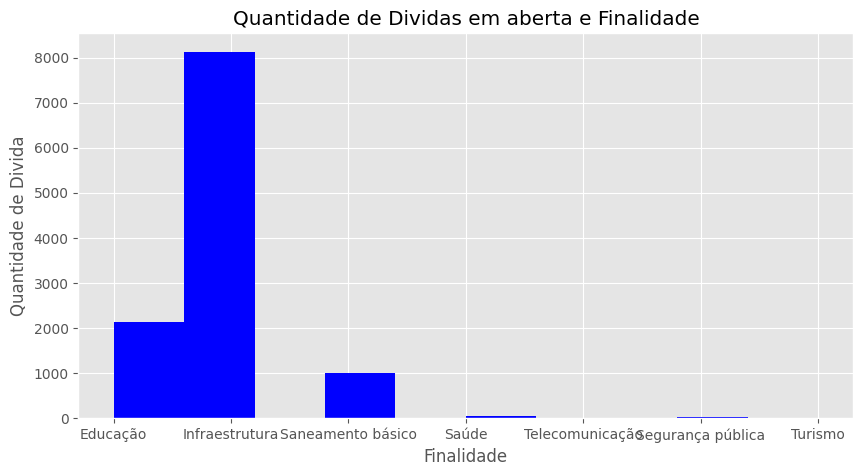

In [184]:
plt.style.use("ggplot")
plt.figure(figsize = (10, 5))
operacoes_otimizada["Finalidade"].hist(color = "blue")
plt.title("Quantidade de Dividas em aberta e Finalidade")
plt.xlabel("Finalidade")
plt.ylabel("Quantidade de Divida")

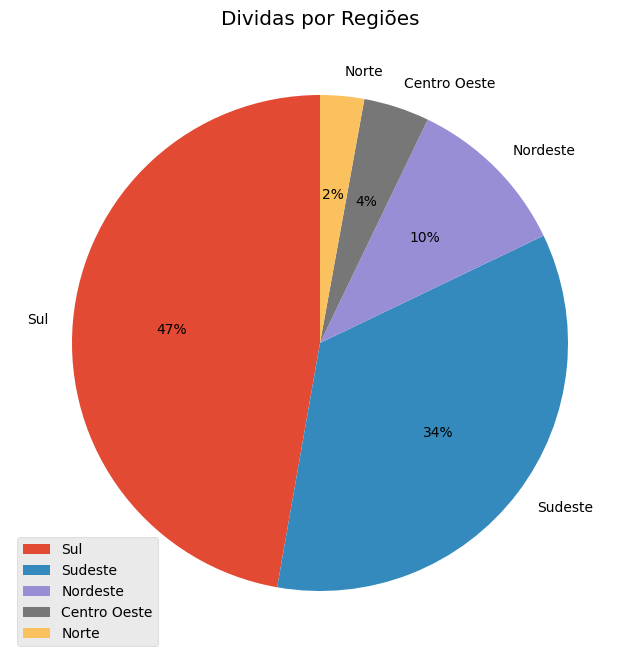

In [219]:
cyl = operacoes_otimizada['Regioes'].value_counts()

plt.pie(cyl, labels = cyl.index, autopct='%1.i%%', startangle=90)

plt.rcParams['figure.figsize'] = (10, 18)

plt.legend(loc='lower left')

plt.title("Dividas por Regiões")

plt.show()